<a href="https://colab.research.google.com/github/LucasMirandaVS/projeto_time_series_analisys_covid/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes

In [1]:
!pip install -q statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 6.9 MB/s 


In [53]:
# Limpeza e dataviz
import numpy as np
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt
import seaborn as sns

# filtrando os avisos do console
import warnings
warnings.filterwarnings('ignore')

# Testes estatísticos
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import itertools 
import statsmodels.api as sm

# Importando os dados

In [3]:
url = 'https://github.com/alura-cursos/Alura-COVID2/raw/main/casos-brasil.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

In [4]:
df['data'] = pd.to_datetime(df['data'])
df['data'] = pd.to_datetime(df.data).dt.date
df.tail()

,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
semana,,,,,,,,,,,,,,,,,
31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


# Selecionando os dados de interesse

In [6]:
# estados de interesse
df_sp = df[df['estado'] == 'SP']
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_es = df[df['estado'] == 'ES']

In [7]:
# Conferindo que a coluna de data é um objeto date
df_sp.index = pd.to_datetime(df_sp.data)
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)
df_es.index = pd.to_datetime(df_es.data)

In [8]:
# selecionando apenas os estados
y = df_sp['Casos']
z = df_mg['Casos']
x = df_rj['Casos']
a = df_es['Casos']

# Teste ADF, ACF e PACF

#### Teste ADF

In [10]:
print('p-valor de São Paulo:',adfuller(y.dropna())[1])

p-valor de São Paulo: 0.9969563888815705


In [11]:
print('p-valor de Minas Gerais:',adfuller(z.dropna())[1])

p-valor de Minas Gerais: 0.8924172587893053


In [12]:
print('p-valor de do Rio de Janeiro:',adfuller(x.dropna())[1])

p-valor de do Rio de Janeiro: 1.0


In [13]:
print('p-valor do Esprítio Santo:',adfuller(z.dropna())[1])

p-valor do Esprítio Santo: 0.8924172587893053


### Funções de visualização

In [20]:
# Função que plota os gráficos de 3 em 3
def plotar(y1,y2,y3,cor1,cor2,cor3,label1,label2,label3):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.legend(fontsize=18)

In [21]:
# Função que plota os gráficos de 4 em 4
def plotar_2(y1,y2,y3,y4,cor1,cor2,cor3,cor4,label1,label2,label3,label4):
    plt.figure(figsize=(20,7))
    plt.plot(y1,color=cor1,label=label1)
    plt.plot(y2,color=cor2,label=label2)
    plt.plot(y3,color=cor3,label=label3)
    plt.plot(y4,color=cor4,label=label4)
    plt.legend(fontsize=18)

In [23]:
def plotarACF(y1,y2,y3):
    fig = plt.figure(figsize=(10,10))
    ax1 = fig.add_subplot(311)
    fig = plot_acf(y1,ax=ax1,title='Original')
    ax2 = fig.add_subplot(312)
    fig = plot_acf(y2,ax=ax2,title='1ª Diferenciação')
    ax3 = fig.add_subplot(313)
    fig = plot_acf(y3,ax=ax3,title='2ª Diferenciação')

#### Verificando a diferenciação dos *estados*

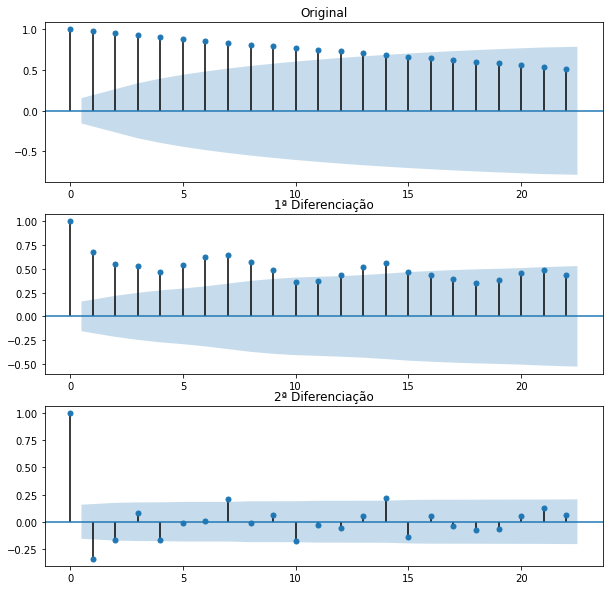

In [26]:
# SP
plotarACF(y,y.diff().dropna(),y.diff().diff().dropna())

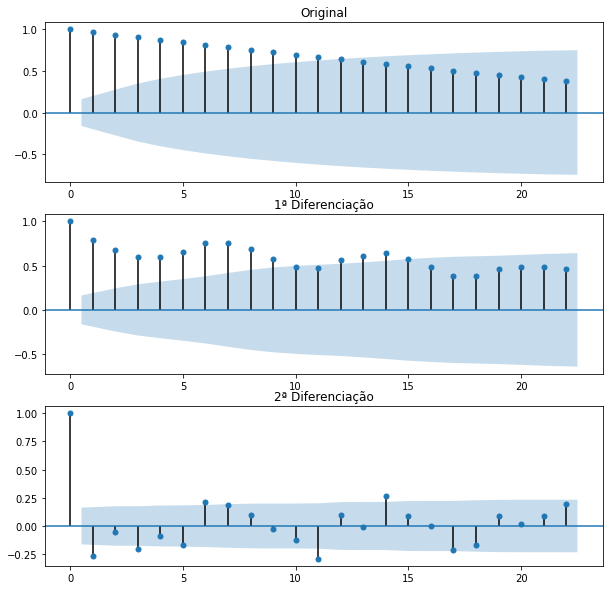

In [27]:
# MG
plotarACF(z,z.diff().dropna(),z.diff().diff().dropna())

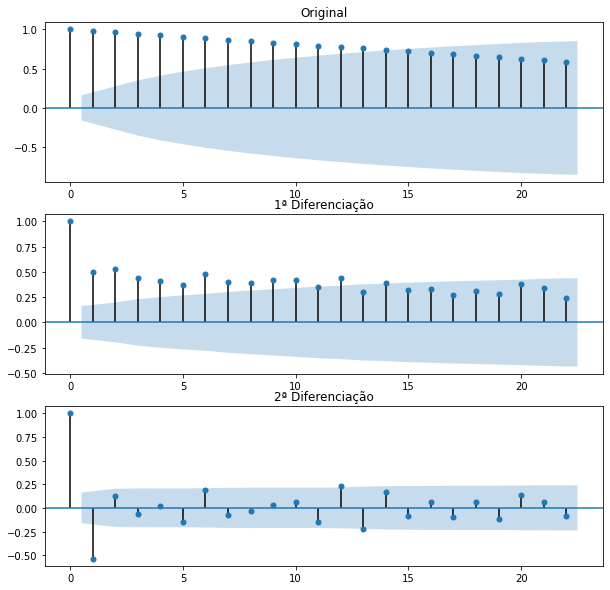

In [28]:
# RJ
plotarACF(x,x.diff().dropna(),x.diff().diff().dropna())

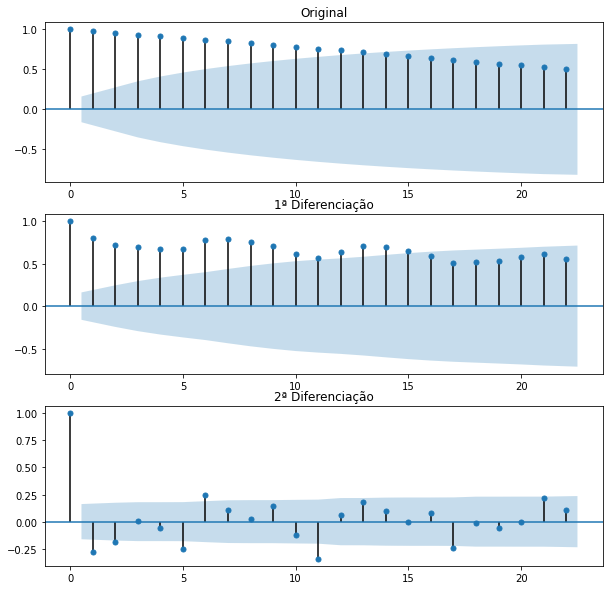

In [29]:
# ES
plotarACF(a,a.diff().dropna(),a.diff().diff().dropna())

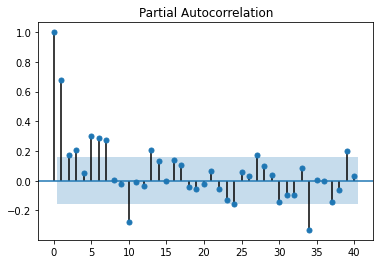

In [30]:
# Verificando se os dados estão diferenciados demais
# SP
plot_pacf(y.diff().dropna(),lags=40); # uma diferenciação

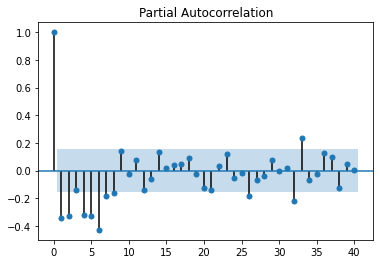

In [31]:
# SP
plot_pacf(y.diff().diff().dropna(),lags=40); # duas diferenciações

Duas é demais.

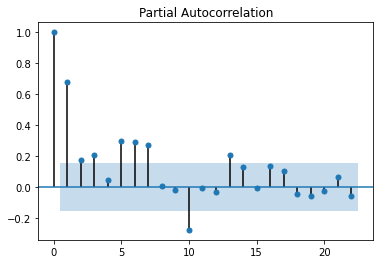

In [32]:
# SP, sem os 40 dias de lag
plot_pacf(y.diff().dropna());

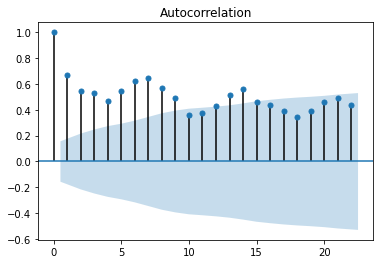

In [33]:
# ACF do SP
plot_acf(y.diff().dropna());

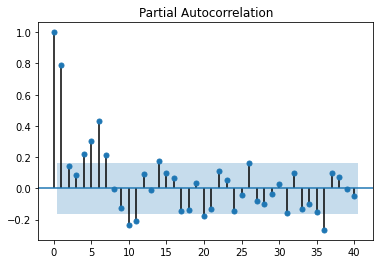

In [34]:
# MG
plot_pacf(z.diff().dropna(),lags=40); # uma diferenciação

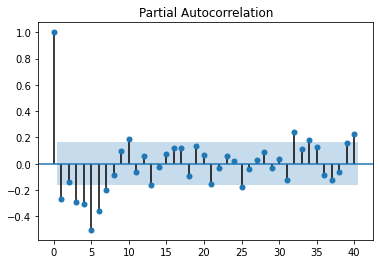

In [35]:
# MG
plot_pacf(z.diff().diff().dropna(),lags=40); # duas diferenciações

Aqui também duas parece ser demais

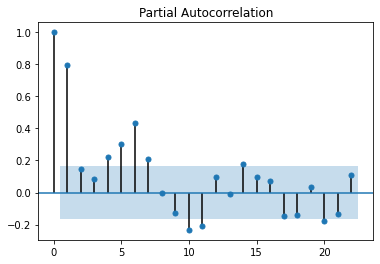

In [36]:
# MG, sem os 40 dias de lag
plot_pacf(z.diff().dropna());

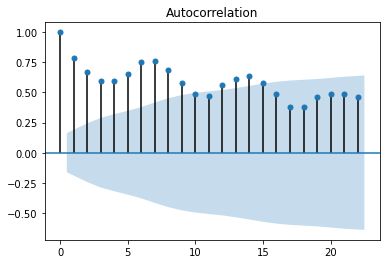

In [37]:
# ACF de MG
plot_acf(z.diff().dropna());

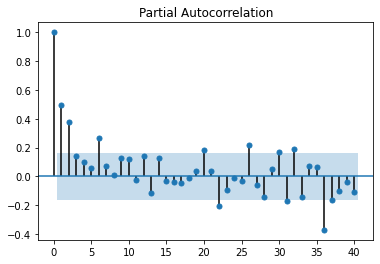

In [38]:
# RJ
plot_pacf(x.diff().dropna(),lags=40); # uma diferenciação

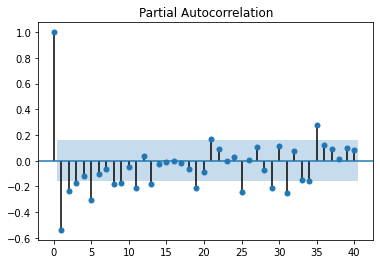

In [39]:
# RJ
plot_pacf(x.diff().diff().dropna(),lags=40); # duas diferenciações

Duas é demais

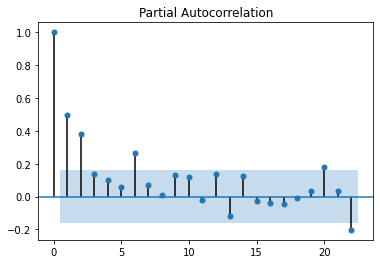

In [40]:
# RJ, sem os 40 dias de lag
plot_pacf(x.diff().dropna());

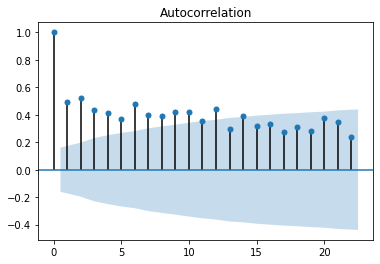

In [41]:
# ACF do RJ
plot_acf(x.diff().dropna());

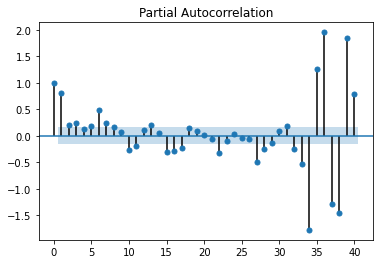

In [42]:
# ES
plot_pacf(a.diff().dropna(),lags=40); # uma diferenciação

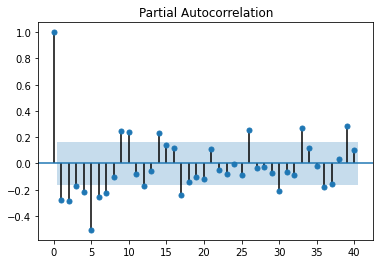

In [43]:
# ES 
plot_pacf(a.diff().diff().dropna(),lags=40); # duas diferenciações

Aqui no entanto parece que duas é melhor que uma

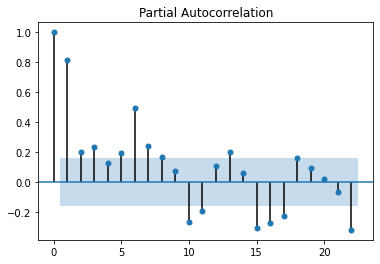

In [44]:
# ES, sem os 40 dias de lag
plot_pacf(a.diff().dropna());

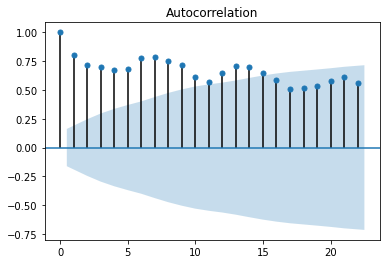

In [45]:
# ACF do ES
plot_acf(a.diff().dropna());

# ARIMA e SARIMA

In [47]:
# Definindo os parametros do modelo
p = d= q = range(0,2)
pdq = list(itertools.product(p, d, q))

In [49]:
# Definindo o componente de sazonalidade
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p,d,q))]

In [51]:
# testando a função
print('Exemplo de combinação de parâmetros para o ARIMA Sazonal')
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[0],seasonal_pdq[2]))

Exemplo de combinação de parâmetros para o ARIMA Sazonal
SARIMAX: (0, 0, 0) x (0, 0, 0, 7)
SARIMAX: (0, 0, 0) x (0, 0, 1, 7)
SARIMAX: (0, 0, 0) x (0, 1, 0, 7)


#### Calculando o AIC

In [59]:
aic_lista_sp = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista_sp.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

In [60]:
aic_lista_sp

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC4312.204463385908',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC4234.919433193472',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3562.871711196248',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC3494.1582680755455',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC3848.3218408698044',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3640.408779393819',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC3149.4472596313217',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC3148.656017413286',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC4203.637153158772',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC4186.578948235436',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC3367.092780686922',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC3273.0519384882145',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC4175.643287397979',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC4177.53354628747',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC3252.353119481565',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC3281.1217326361584',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC3140.724225355021',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC3055.2982248348067',
 'ARI

In [61]:
# Calculando o modelo p sp
mod_sp = sm.tsa.statespace.SARIMAX(y,
                               order = (1,1,1),
                               seasonal_order=(1,1,1,7))
results = mod_sp.fit()

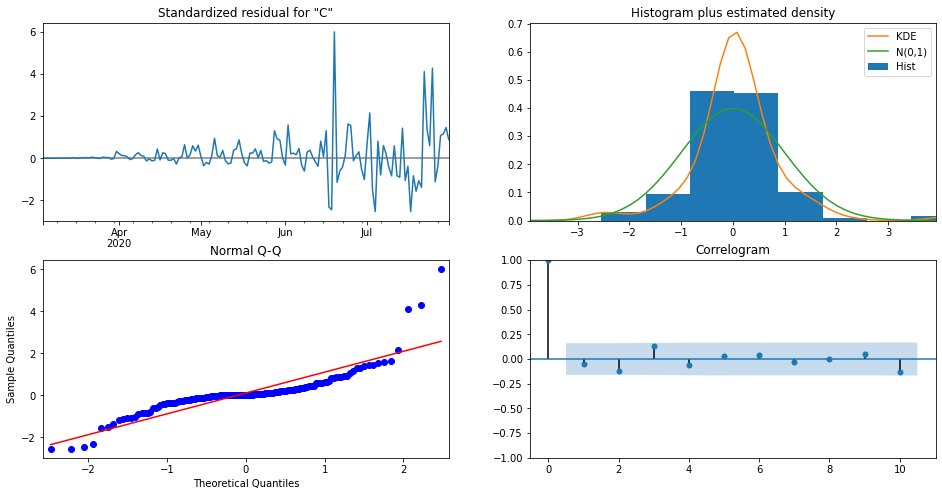

In [62]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [65]:
# Agora para MG
aic_lista_mg = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(z,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista_mg.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

In [64]:
aic_lista_mg

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3772.423229220175',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3698.4316749760765',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3020.6690037983653',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2907.0626034044813',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC4.0',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3092.6881977418498',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2742.973899839046',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2734.0546460843934',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3670.4515504256547',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3467.2103613851386',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2862.4158772592277',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2797.855362545988',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3643.6559246673623',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3645.434067068668',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2662.0644676561083',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2639.2121638131757',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2610.5998888805852',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2562.900130664373',
 'ARIMA(0, 1

In [66]:
# Calculando o modelo p MG
mod_mg = sm.tsa.statespace.SARIMAX(z,
                               order = (1,1,1),
                               seasonal_order=(1,1,1,7))
results = mod_mg.fit()

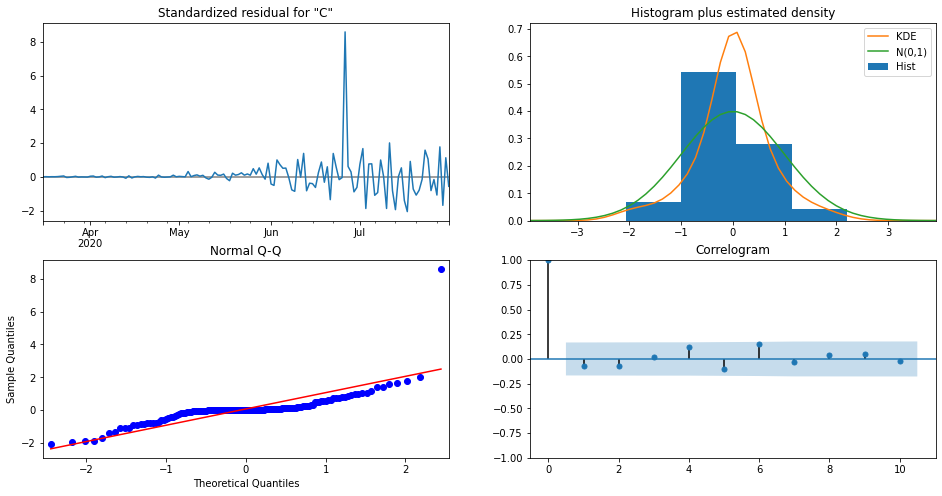

In [67]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [68]:
# Agora para RJ
aic_lista_rj = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(x,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista_rj.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

In [69]:
aic_lista_rj

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3772.423229220175',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3698.4316749760765',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC3020.6690037983653',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2907.0626034044813',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC4.0',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC3092.6881977418498',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2742.973899839046',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2734.0546460843934',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3670.4515504256547',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3467.2103613851386',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2862.4158772592277',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2797.855362545988',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC3643.6559246673623',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3645.434067068668',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2662.0644676561083',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2639.2121638131757',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2610.5998888805852',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2562.900130664373',
 'ARIMA(0, 1

In [72]:
# Calculando o modelo p RJ
mod_rj = sm.tsa.statespace.SARIMAX(z,
                               order = (1,1,1),
                               seasonal_order=(1,1,1,7))
results = mod_rj.fit()

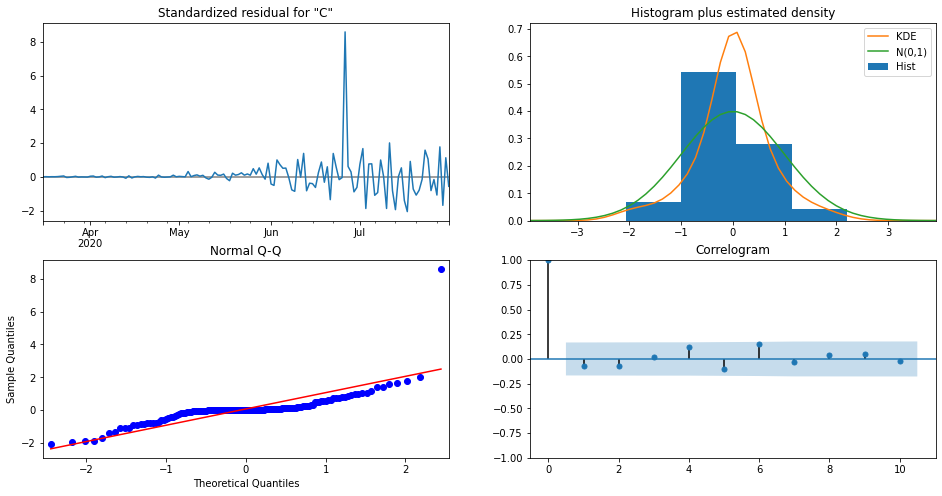

In [73]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [76]:
# ES
aic_lista_es = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(a,
                                       order=param,
                                       seasonal_order=param_seasonal)
        results = mod.fit()
        aic_lista_es.append('ARIMA{}x{} - AIC{}'.format(param, param_seasonal, results.aic))

In [77]:
aic_lista_es

['ARIMA(0, 0, 0)x(0, 0, 0, 7) - AIC3511.5832234170043',
 'ARIMA(0, 0, 0)x(0, 0, 1, 7) - AIC3439.3928740741703',
 'ARIMA(0, 0, 0)x(0, 1, 0, 7) - AIC2821.9528441092243',
 'ARIMA(0, 0, 0)x(0, 1, 1, 7) - AIC2658.706361193663',
 'ARIMA(0, 0, 0)x(1, 0, 0, 7) - AIC4.0',
 'ARIMA(0, 0, 0)x(1, 0, 1, 7) - AIC2837.719261682669',
 'ARIMA(0, 0, 0)x(1, 1, 0, 7) - AIC2367.361751724525',
 'ARIMA(0, 0, 0)x(1, 1, 1, 7) - AIC2356.0440389680984',
 'ARIMA(0, 0, 1)x(0, 0, 0, 7) - AIC3316.4303737273176',
 'ARIMA(0, 0, 1)x(0, 0, 1, 7) - AIC3159.3605759659795',
 'ARIMA(0, 0, 1)x(0, 1, 0, 7) - AIC2645.757637407217',
 'ARIMA(0, 0, 1)x(0, 1, 1, 7) - AIC2523.7222339439218',
 'ARIMA(0, 0, 1)x(1, 0, 0, 7) - AIC2816.9085251565207',
 'ARIMA(0, 0, 1)x(1, 0, 1, 7) - AIC3386.374408621409',
 'ARIMA(0, 0, 1)x(1, 1, 0, 7) - AIC2274.919562317019',
 'ARIMA(0, 0, 1)x(1, 1, 1, 7) - AIC2478.6254211279384',
 'ARIMA(0, 1, 0)x(0, 0, 0, 7) - AIC2388.25864037828',
 'ARIMA(0, 1, 0)x(0, 0, 1, 7) - AIC2281.109556192885',
 'ARIMA(0, 1, 0)

In [80]:
# Calculando o modelo p ES
mod_es = sm.tsa.statespace.SARIMAX(a,
                               order = (1,1,1),
                               seasonal_order=(0,1,1,7))
results = mod_es.fit()

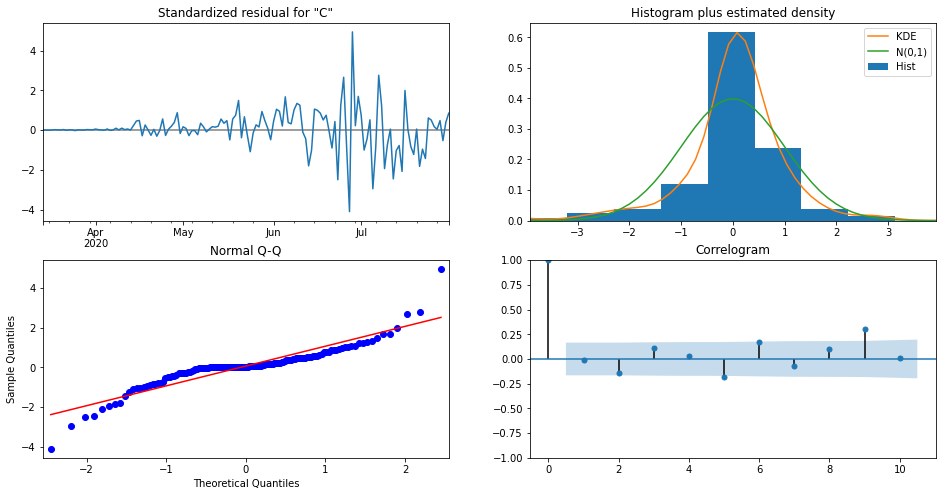

In [81]:
results.plot_diagnostics(figsize=(16,8))
plt.show()